In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [3]:
data = pd.read_csv("../Data/cardio_train.csv", delimiter=';')   
# Obs, eftersom ';' användes som delimiter så blev det fel när jag visar tabellen, 
# OM jag inte berättar för den att den ska betrakta ';' som delimiter. Default är ','

## 1.1 Explorative Data Analysis (EDA)

a) Hur många är positiva för hjärt-kärlsjukdom och hur många är negativa?

In [4]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [6]:
data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
data["cardio"].value_counts(), data["gender"].value_counts()

(cardio
 0    35021
 1    34979
 Name: count, dtype: int64,
 gender
 1    45530
 2    24470
 Name: count, dtype: int64)

In [8]:
total = data["cardio"].count()
positive = data[data["cardio"] == 1]["cardio"].count()
# data(boolean mask) ger dataset med alla kolumner där cardio == 1. 
# om detta uttryck ovan är hela detta dataset (data(boolean mask)), så lägger jag till ["cardio"] efter för att 
# enbart få "cardio" kolumnen i detta dataset
negative = data[data["cardio"] == 0]["cardio"].count()

print(f"The amount that are positive to cardiovascular disease are {positive} and {negative} are negative\n")
print(f"The total amount of rows are {total}, check if I got all patients: {positive + negative} = {total}")


The amount that are positive to cardiovascular disease are 34979 and 35021 are negative

The total amount of rows are 70000, check if I got all patients: 70000 = 70000


b) Hur stor andel har normala, över normala och långt över normala kolesterolvärden?

In [9]:
total_cholesterol = data["cholesterol"].count()
normal_cholesterol = data[data["cholesterol"] == 1]["cholesterol"].count()/total_cholesterol
above_normal_cholesterol = data[data["cholesterol"] == 2]["cholesterol"].count()/total_cholesterol
high_above_normal_cholesterol = data[data["cholesterol"] == 3]["cholesterol"].count()/total_cholesterol

print(f'''The percentages are as follows: 
{normal_cholesterol = :.2%}
{above_normal_cholesterol = :.2%}
{high_above_normal_cholesterol = :.2%}''')

The percentages are as follows: 
normal_cholesterol = 74.84%
above_normal_cholesterol = 13.64%
high_above_normal_cholesterol = 11.52%


c) Hur ser åldersfördelningen ut?

Svar: Skevt fördelat åt höger, inte så förvånande med tanke på att det är hjärtsjukdomar

In [10]:
# Gör om från antal dagar till årtal som ålder
# data["age"] = round(data["age"]/365)     # possible this way, also floor division as below
data["age"] = data["age"]//365

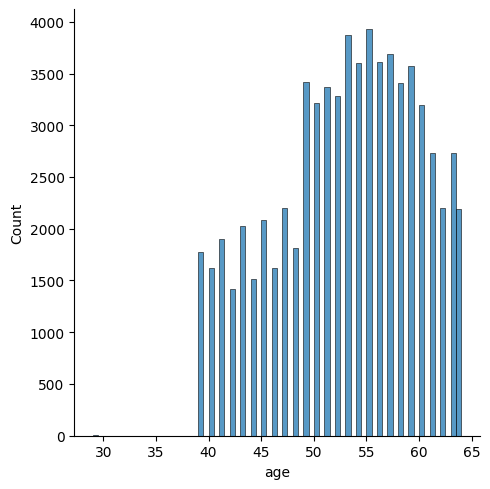

In [11]:
# Plottar fördelning
# sns.catplot(data, x=data["age"], kind = "count")
sns.displot(x = data["age"],bins = 70, data = data)

d) Hur stor andel röker?

In [12]:
total_smokers = data["smoke"].count()
smokers = data[data["smoke"] == 1]["smoke"].count()/total_smokers
non_smokers = data[data["smoke"] == 0]["smoke"].count()/total_smokers

print(f'''The percentages are as follows: 
{smokers = :.2%}
{non_smokers = :.2%}''')

The percentages are as follows: 
smokers = 8.81%
non_smokers = 91.19%


e) Hur ser viktfördelningen ut?

Svar: Ser någorlunda normalfördelat ut

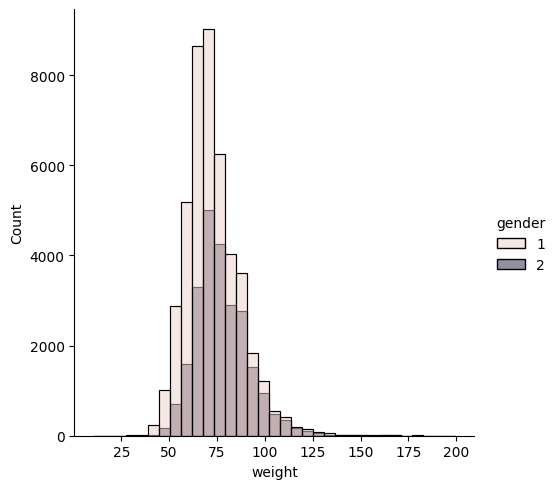

In [13]:
# Plottar fördelning
# sns.catplot(data, x=data["weight"], kind = "count")
sns.displot(x = data["weight"],bins =33, hue=data["gender"], data = data)

f) Hur ser längdfördelningen ut?

Svar: Ser också normalfördelat ut, och att ha lägre spridning än vikten

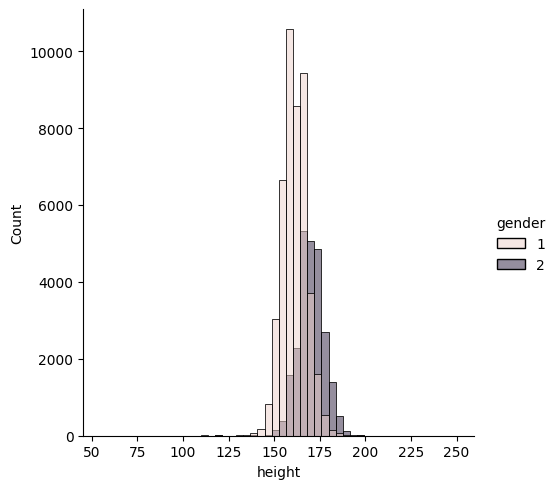

In [14]:
# Plottar fördelning
# sns.catplot(data, x=data["height"], kind = "count")
sns.displot(x = data["height"],hue=data["gender"],bins = 50, data = data)

g) Hur stor andel av kvinnor respektive män har hjärt-kärlsjukdom?

In [15]:
# Sammanställa antal totalt, män och kvinnor i dataset
total_positive = data[data["cardio"] == 1]["cardio"].count()
total_females = data[data["gender"] == 1]["gender"].count()
total_males = data[data["gender"] == 2]["gender"].count()

# Antal som har sjukdom
positive_males = data[(data["cardio"] == 1) & (data["gender"] == 2)]["cardio"].count()
positive_females = data[(data["cardio"] == 1) & (data["gender"] == 1)]["cardio"].count()

# Andelar
percentage_males_total = positive_males/total_positive
percentage_females_total = positive_females/total_positive

percentage_females = positive_females/total_females
percentage_males = positive_males/total_males

print(f"The amount that are positive to cardiovascular disease per gender are {percentage_males_total = :.0%} and {percentage_females_total= :.0%}")
print(f"The percentage positive to cardiovascular disease in each gender category are {percentage_females = :.0%} and {percentage_males = :.0%}")



The amount that are positive to cardiovascular disease per gender are percentage_males_total = 35% and percentage_females_total= 65%
The percentage positive to cardiovascular disease in each gender category are percentage_females = 50% and percentage_males = 51%


### Sammanfattning av resultat hittills

- Ungefär hälften av de undersökta har en kardiovaskulär sjukdom. 
- ca en fjärdedel har över normala kolesterolvärden
- Åldersfördelningen är skevt fördelad åt höger
- ca 10% röker
- Viktfördelningen är någorlunda normalfördelat
- Längdfördelningen är också normal
- Andelen kvinnor med hjärt-kärlsjukdom är nästan dubbelt så hög som män
    - Men det beror på att fler kvinnor är med i datasetet, andelen är lika stor när man jämför mot antalet män och kvinnor i datasetet

## 1.2 Modell design

- Skapa en heatmap av korrelationer i datan

In [16]:
data.corr().head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,1.000000,0.003814,0.003502,-0.003038,-0.001830,0.003356,-0.002529,0.006106,0.002467,-0.003699,0.001210,0.003755,0.003799
age,0.003814,1.000000,-0.022913,-0.081506,0.053561,0.020854,0.017620,0.154012,0.098388,-0.047649,-0.029756,-0.009998,0.237985
gender,0.003502,-0.022913,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109
height,-0.003038,-0.081506,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821
weight,-0.001830,0.053561,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660


<Axes: >

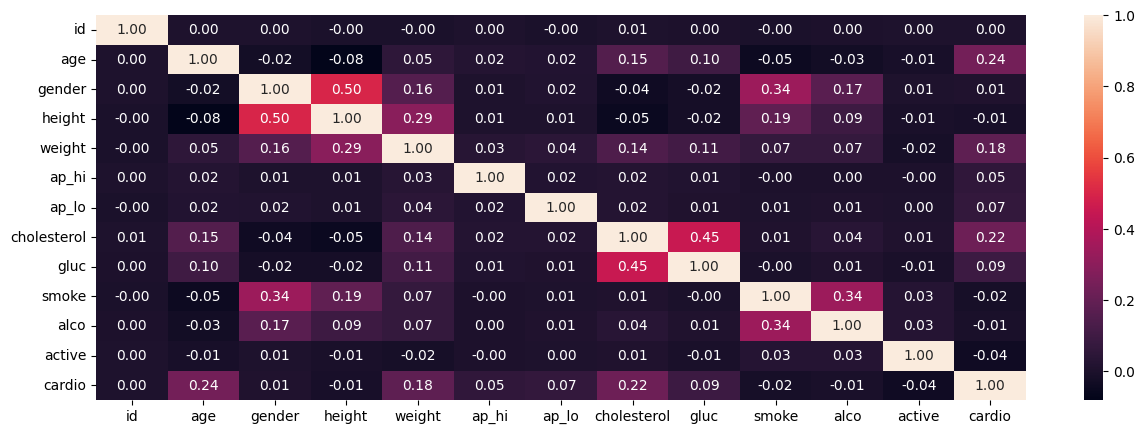

In [17]:
fig = plt.figure(figsize=(15,5))
sns.heatmap(data.corr(), annot=True, fmt=".2f")

### Kommentar till heatmap

Jag tittar på korrelationer för "cardio"(de som har kardiovaskulär sjukdom) med övriga features. 
- Ålder har högst korrelation med "cardio" (0.24)
- Kolesterol kommer på andra plats (0.22)
- Vikt kommer på tredje plats (0.18)
- Mina analyser bekräftas med dessa korrelationer, och särskilt den för gender påvisar det faktum att antal högre mängd kvinnor i studien påverkat andelen kvinnor med sjukdom av totala antal sjuka, men att det normaliserat per antal män och kvinnor är samma andel.

## Feature Engineering

Skapa en feature för BMI (Body Mass Index), 
- BMI = vikt / längd^2

a) Släng de samples med orimliga BMIer och outliers. Notera att detta kan
vara svårt att avgöra i vilket range av BMIer som vi ska spara. Beskriv
hur du kommer fram till gränserna, med resonemang eller referens.

** Kommentar: Jag satte gränserna mellan 15 och upp till 50. Detta eftersom värden utanför detta är extrema och sällsynta. Jag baserar det på information från artikeln i Wikipedia.

In [18]:
# Convert height from cm to m
data["height"] = data["height"]/100     

# Create BMI feature
data["BMI"] = data["weight"]/(data["height"]**2)

In [19]:
data["BMI"].describe()

count    70000.000000
mean        27.556513
std          6.091511
min          3.471784
25%         23.875115
50%         26.374068
75%         30.222222
max        298.666667
Name: BMI, dtype: float64

In [20]:
data[data["BMI"] > 55].count()
data[data["BMI"] < 15].count()

id             27
age            27
gender         27
height         27
weight         27
ap_hi          27
ap_lo          27
cholesterol    27
gluc           27
smoke          27
alco           27
active         27
cardio         27
BMI            27
dtype: int64

In [21]:
# Update data without outlier BMI values
data = data[(data["BMI"] >= 15) & (data["BMI"] <= 55)]

b) Skapa en kategorisk BMI-feature med kategorierna: normal range, overweight,
obese (class I), obese (class II), obese (class III).


In [22]:
# Define intervals and categories
intervals = [18.5, 25, 30, 35, 39.9, float('inf')]
categories = ["normal range", "overweight", "obese (class I)", "obese (class II)", "obese (class III)"]

# Create the categorical BMI feature
data["BMI_category"] = pd.cut(data["BMI"], bins=intervals, labels=categories, right = False)



c) Undersök om kategorin är relevant, dvs dess korrelationer. Uppdatera
data-analysen om du hittar något intressant.

In [23]:
# Ändra namn på BMI kategorier till siffror, 1-5

# Skapar först kopia för att använda senare när jag gör one-hot encoding (fick true/false bara utan att göra det)
data["BMI_category"] = data["BMI_category"].cat.codes + 1 

<Axes: >

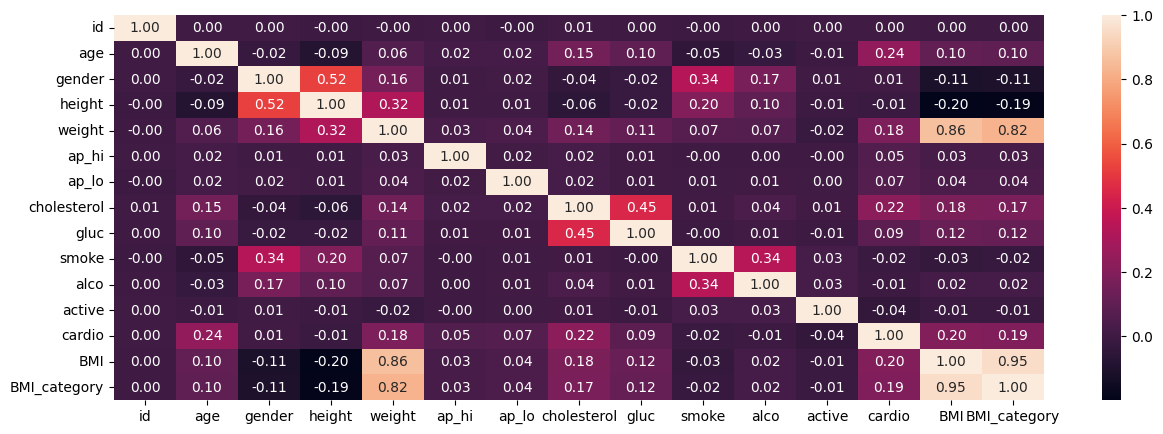

In [24]:
fig = plt.figure(figsize=(15,5))
sns.heatmap(data.corr(), annot=True, fmt=".2f")

### Kommentarer till korrelationer
BMI och kategorierna har högre korrelationer till förekomst av cardiovascular disease  än vikt och längd, men i nära nivå med vikt.
Det bekräftar egentligen tidigare analys om att vikt är korrelerat till sjukdomen, men kan vara så att BMI fångar ett mer komplext samband mellan vikt och längd i förhållande till sjukdom som korrelerar bättre.
Jag finner det intressant att BMI har 0.86 korrelation med vikt och -0.2 med längd, vilket kan bero på att längden inte direkt proportioneras med vikten i BMI-formeln.
**OBS**: Eftersom ordinalskalan jag valt för kategorierna inte har konstanta avstånd, så tolkar jag korrelationen med försiktighet och som en indikation på att det kan finnas ett samband i mina förstudier, inför kommande analyser med andra metoder. 


Skapa en feature för blodtryckskategorier enligt tabellen i denna artikel.

a) Släng bort samples med orimliga blodtryck och outliers. Likt förra uppgiften
är det inte trivialt att sätta gränserna. Beskriv hur du kommer fram
till gränserna.

In [25]:
# Filtrera på värden valda med vägledning från 1177.se
data = data[(70 <= data["ap_hi"]) & (data["ap_hi"] <= 180) & (40 <= data["ap_lo"]) & (data["ap_lo"] <= 120)]

# filtered_df = df[(df['ap_hi'].between(70, 180)) & (df['ap_lo'].between(40, 120))]

b) Skapa en kategorisk feature med relevanta kategorier.

In [26]:
# Define categories (Källa: Artikeln som länkades till i övningen)
conditions = [
    (data['ap_hi'] <= 120) & (data['ap_lo'] <= 80),
    (data['ap_hi'] > 120) & (data['ap_hi'] <= 129) & (data['ap_lo'] <= 80),
    (data['ap_hi'] >= 130) & (data['ap_hi'] <= 139) & (data['ap_lo'] >= 80) & (data['ap_lo'] <= 89),
    (data['ap_hi'] >= 140) & (data['ap_hi'] <= 180) & (data['ap_lo'] >= 90) & (data['ap_lo'] <= 120),
    (data['ap_hi'] > 180) & (data['ap_lo'] > 120)
]

categories = ['Healthy', 'Elevated', 'Stage 1 hypertension', 'Stage 2 hypertension', 'Hypertension crisis' ]

# Create a new feature 'ap_cat' based on conditions set

data['ap_cat'] = np.select(conditions, categories, default='Other')


In [27]:
# What categories are present in my data? 
# "Other" do ot fit in any category

data["ap_cat"].unique()

array(['Healthy', 'Stage 2 hypertension', 'Other', 'Stage 1 hypertension',
       'Elevated'], dtype=object)

In [28]:
# Filter away "other" since they can affect the analysis in unexpected ways 
data = data[data["ap_cat"] != "Other"]

In [29]:
data['ap_cat'] = data['ap_cat'].astype('category')

In [30]:
# Ändra namn på ap_cat till siffror (måste vara category, därav föregående del)
# Kopia för att ha kategorier i text för one hot encoding

conditions = [
    (data['ap_cat'] == 'Healthy'),
    (data['ap_cat'] == 'Elevated'),
    (data['ap_cat'] == 'Stage 1 hypertension'),
    (data['ap_cat'] == 'Stage 2 hypertension'),
    (data['ap_cat'] == 'Hypertension crisis'),
]

categories = [1, 2, 3, 4, 5]

data['ap_cat'] = np.select(conditions, categories, default='Other')

In [31]:
data["ap_cat"].unique()

array(['1', '4', '3', '2'], dtype=object)

c) Undersök om den nya kategorin är relevant, dvs har den någon nyttig
korrelation? Uppdatera data-analysen om du hittar något intressant


<Axes: >

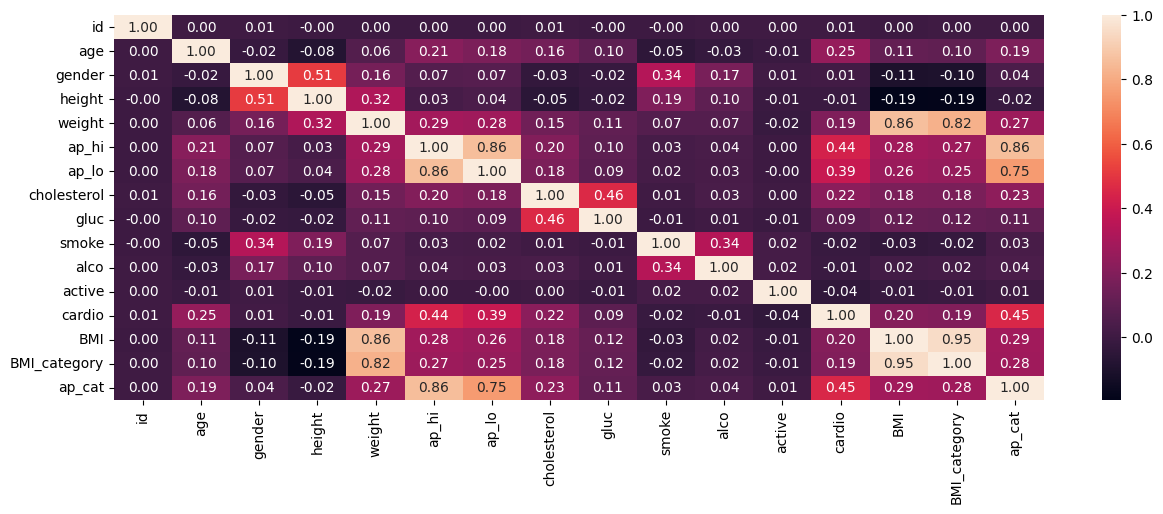

In [32]:
fig = plt.figure(figsize=(15,5))
sns.heatmap(data.corr(), annot=True, fmt=".2f")

### Kommentarer till blodtryckskategorier
- Den högsta korrelationen till cardiovascular disease är nu relaterat till blodtryckskategorierna.
- Även systolisk och diastolisk fick högre korrelation nu förutom kategorierna, och det kan bero på att extrem
värden maskerade samband tidigare (och som nu har filtrerats bort).

## 1.2.2 Skapa två dataset

Skapa en kopia av din dataframe.
· På ena dataframen: ta bort följande features: ap hi, ap lo, height,
weight, BMI och gör one-hot encoding på BMI-kategori, blodtryckskategori
samt kön
· På andra dataframen: ta bort följande features: BMI-kategori, blodtryckskategori,
height, weight och gör one-hot encoding på kön
Alltså en datamängd med kategorisk data tillagd och en med endast BMI tillagd.

In [33]:
# Mappar om så att jag får tillbaka ursprungliga 
# kategorier (Ej ordinalskala, då det blev lite problem med to_dummies
# där jag istället för 1:or och 0:or fick False, True värden). 


In [34]:
# Skapa en kopia av dataframen
data_1 = data.copy()

# Ta bort angivna features
data_1.drop(['ap_hi', 'ap_lo', 'height', 'weight', 'BMI'], axis=1, inplace=True)

# Gör one-hot encoding på på BMI_category, ap_cat, och gender
data_1 = pd.get_dummies(data_1, columns=['BMI_category', 'ap_cat', 'gender'], dtype = int)

data_1.head()


,id,age,cholesterol,gluc,smoke,alco,active,cardio,BMI_category_0,BMI_category_1,BMI_category_2,BMI_category_3,BMI_category_4,BMI_category_5,ap_cat_1,ap_cat_2,ap_cat_3,ap_cat_4,gender_1,gender_2
0,0,50,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1
1,1,55,3,1,0,0,1,1,0,0,0,1,0,0,0,0,0,1,1,0
3,3,48,1,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,1
4,4,47,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
5,8,60,2,2,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0


In [35]:
# Skapa en kopia av dataframen
data_2 = data.copy()

# Ta bort angivna features
data_2 = data_2.drop(['BMI_category', 'ap_cat', 'height', 'weight'], axis=1)

# Gör one-hot encoding på gender
data_2 = pd.get_dummies(data_2, columns=['gender'], dtype= int)

print(data_2.head())


   id  age  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  active  cardio  \
0   0   50    110     80            1     1      0     0       1       0   
1   1   55    140     90            3     1      0     0       1       1   
3   3   48    150    100            1     1      0     0       1       1   
4   4   47    100     60            1     1      0     0       0       0   
5   8   60    120     80            2     2      0     0       0       0   

         BMI  gender_1  gender_2  
0  21.967120         0         1  
1  34.927679         1         0  
3  28.710479         0         1  
4  23.011177         1         0  
5  29.384676         1         0  


## 1.2.3 Utförande

Välj tre eller fler algoritmer. 
För varje algoritm:


a) Använd gridsearchCV för att skala och hyperparameteroptimisera varje
algoritm

b) Utvärdera resulterande modell

c) Kolla hyperparametrarna som ledde till bäst resultat

d) Samla data om utfallet för senare presentation

Upprepa detta för båda datamängderna. 

Välj datamängd och modell utifrån
dina resultat.


Dokumentera resultaten och motivera valen.

In [36]:
# Väljer logistic regression och KNN, gör klart allt och sedan lägger till tredje modell på slutet

### Dataset 1 (data_1)

In [39]:
X, y = data_1.drop("cardio", axis=1), data_1["cardio"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Establishing pipelines and gridsearchCV for each model

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
import numpy as np


scaler = StandardScaler()

# pipeline with StandardScaler and KNN
pipe_KNN = Pipeline([("scaler", scaler), ("knn", KNeighborsClassifier())])

# pipeline with StandardScaler and LogisticRegression
pipe_log_reg = Pipeline([("scaler", scaler), ("log", LogisticRegression(
    solver="saga", multi_class = "ovr", max_iter=5000, penalty="elasticnet"))])

# Other models
pipe_rf = Pipeline([("scaler", scaler), ("rf", RandomForestClassifier())])
pipe_svm = Pipeline([("scaler", scaler), ("svm", SVC())])
pipe_nb = Pipeline([("scaler", scaler), ("nb", GaussianNB())])
pipe_nn = Pipeline([("scaler", scaler), ("nn", MLPClassifier())])


param_grid_KNN = {"knn__n_neighbors": list(range(1, 20))}

l1_ratio = np.linspace(0, 1, 20)

param_grid_log_reg = {"log__l1_ratio": l1_ratio}

# parameter grids
param_grid_rf = {
    'rf__n_estimators': [50, 100],
    'rf__max_depth': [None, 10],
}

param_grid_nb = {}

param_grid_svm = {
    'svm__C': [0.1, 1],
    'svm__kernel': ['linear', 'rbf'],
}

param_grid_nn = {
    'nn__hidden_layer_sizes': [(50, 50), (100,)],
    'nn__alpha': [0.0001, 0.05],
}

classifier_KNN = GridSearchCV(
    estimator=pipe_KNN, param_grid=param_grid_KNN, cv=3, scoring="recall")

classifier_log_reg = GridSearchCV(
    estimator=pipe_log_reg, param_grid=param_grid_log_reg, cv=3, scoring="recall"
)

classifier_rf = GridSearchCV(estimator=pipe_rf, param_grid=param_grid_rf, cv=3, scoring="recall")
classifier_svm = GridSearchCV(estimator=pipe_svm, param_grid=param_grid_svm, cv=3, scoring="recall")
classifier_nb = GaussianNB()  # no hyperparameters to tune
classifier_nn = GridSearchCV(estimator=pipe_nn, param_grid=param_grid_nn, cv=3, scoring="recall")


### Train

In [41]:
# it will scale the data to X_train using StandardScaler
classifier_KNN.fit(X_train, y_train)



GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='recall')

In [42]:
classifier_log_reg.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('log',
                                        LogisticRegression(max_iter=5000,
                                                           multi_class='ovr',
                                                           penalty='elasticnet',
                                                           solver='saga'))]),
             param_grid={'log__l1_ratio': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ])},
             scoring='recall')

In [43]:
classifier_rf.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('rf', RandomForestClassifier())]),
             param_grid={'rf__max_depth': [None, 10],
                         'rf__n_estimators': [50, 100]},
             scoring='recall')

In [44]:
classifier_svm.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svm', SVC())]),
             param_grid={'svm__C': [0.1, 1], 'svm__kernel': ['linear', 'rbf']},
             scoring='recall')

In [45]:
classifier_nb.fit(X_train, y_train)

GaussianNB()

In [107]:
classifier_rf.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('rf', RandomForestClassifier())],
 'verbose': False,
 'scaler': StandardScaler(),
 'rf': RandomForestClassifier(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'rf__bootstrap': True,
 'rf__ccp_alpha': 0.0,
 'rf__class_weight': None,
 'rf__criterion': 'gini',
 'rf__max_depth': None,
 'rf__max_features': 'sqrt',
 'rf__max_leaf_nodes': None,
 'rf__max_samples': None,
 'rf__min_impurity_decrease': 0.0,
 'rf__min_samples_leaf': 1,
 'rf__min_samples_split': 2,
 'rf__min_weight_fraction_leaf': 0.0,
 'rf__monotonic_cst': None,
 'rf__n_estimators': 100,
 'rf__n_jobs': None,
 'rf__oob_score': False,
 'rf__random_state': None,
 'rf__verbose': 0,
 'rf__warm_start': False}

              precision    recall  f1-score   support

           0       0.71      0.77      0.74      9368
           1       0.70      0.63      0.67      8015

    accuracy                           0.71     17383
   macro avg       0.71      0.70      0.70     17383
weighted avg       0.71      0.71      0.71     17383



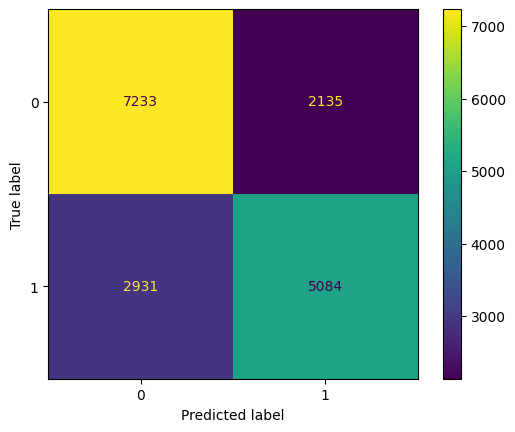

In [46]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix

y_pred = classifier_KNN.predict(X_test)
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

              precision    recall  f1-score   support

           0       0.70      0.86      0.77      9368
           1       0.78      0.58      0.66      8015

    accuracy                           0.73     17383
   macro avg       0.74      0.72      0.72     17383
weighted avg       0.74      0.73      0.72     17383



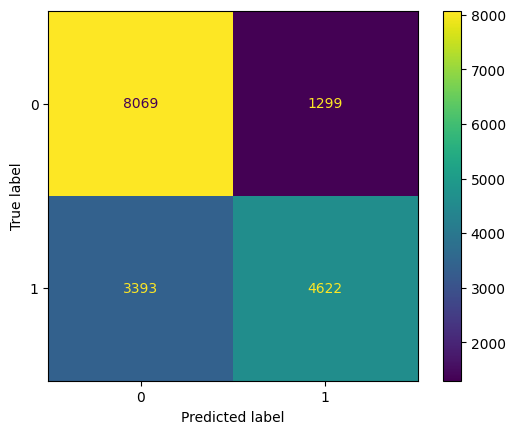

In [47]:
y_pred = classifier_log_reg.predict(X_test)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

Random Forest:
              precision    recall  f1-score   support

           0       0.70      0.69      0.69      9368
           1       0.64      0.65      0.64      8015

    accuracy                           0.67     17383
   macro avg       0.67      0.67      0.67     17383
weighted avg       0.67      0.67      0.67     17383



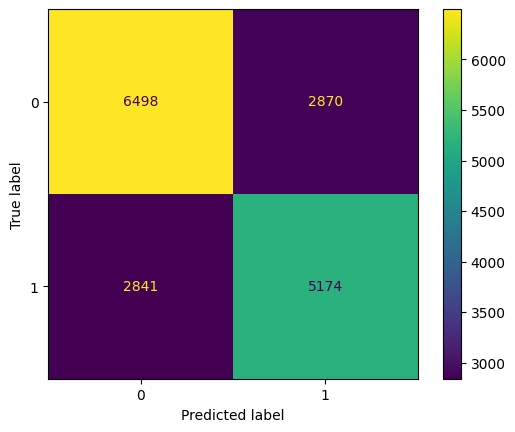

In [48]:
# Make predictions and evaluate for Random Forest
y_pred_rf = classifier_rf.predict(X_test)
print("Random Forest:")
print(classification_report(y_test, y_pred_rf))
cm_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(cm_rf).plot()




SVM:
              precision    recall  f1-score   support

           0       0.71      0.86      0.78      9368
           1       0.78      0.59      0.67      8015

    accuracy                           0.73     17383
   macro avg       0.74      0.72      0.72     17383
weighted avg       0.74      0.73      0.73     17383



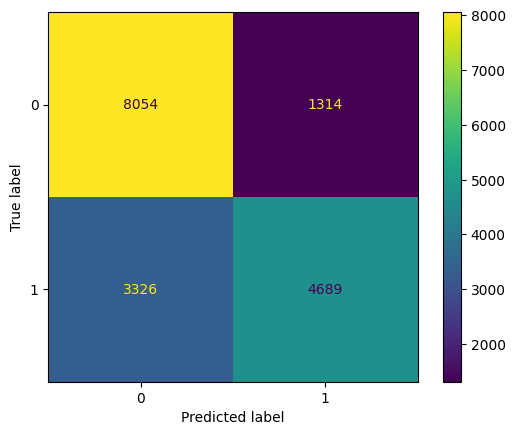

In [49]:
# Make predictions and evaluate for SVM
y_pred_svm = classifier_svm.predict(X_test)
print("\nSVM:")
print(classification_report(y_test, y_pred_svm))
cm_svm = confusion_matrix(y_test, y_pred_svm)
ConfusionMatrixDisplay(cm_svm).plot()




Naive Bayes:
              precision    recall  f1-score   support

           0       0.65      0.88      0.75      9368
           1       0.77      0.45      0.57      8015

    accuracy                           0.68     17383
   macro avg       0.71      0.67      0.66     17383
weighted avg       0.71      0.68      0.67     17383



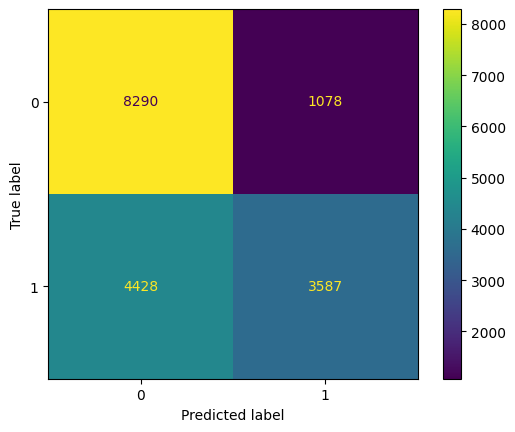

In [50]:
# Make predictions and evaluate for Naive Bayes
y_pred_nb = classifier_nb.predict(X_test)
print("\nNaive Bayes:")
print(classification_report(y_test, y_pred_nb))
cm_nb = confusion_matrix(y_test, y_pred_nb)
ConfusionMatrixDisplay(cm_nb).plot()



### Dataset 2 (data_2)

In [51]:
X, y = data_2.drop("cardio", axis=1), data_2["cardio"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [62]:
# it will scale the data to X_train using StandardScaler
classifier_KNN.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='recall')

In [53]:
classifier_log_reg.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('log',
                                        LogisticRegression(max_iter=5000,
                                                           multi_class='ovr',
                                                           penalty='elasticnet',
                                                           solver='saga'))]),
             param_grid={'log__l1_ratio': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ])},
             scoring='recall')

In [54]:
classifier_rf.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('rf', RandomForestClassifier())]),
             param_grid={'rf__max_depth': [None, 10],
                         'rf__n_estimators': [50, 100]},
             scoring='recall')

In [55]:
classifier_svm.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svm', SVC())]),
             param_grid={'svm__C': [0.1, 1], 'svm__kernel': ['linear', 'rbf']},
             scoring='recall')

In [56]:
classifier_nb.fit(X_train, y_train)

GaussianNB()

              precision    recall  f1-score   support

           0       0.71      0.77      0.74      9368
           1       0.70      0.64      0.67      8015

    accuracy                           0.71     17383
   macro avg       0.71      0.70      0.70     17383
weighted avg       0.71      0.71      0.71     17383



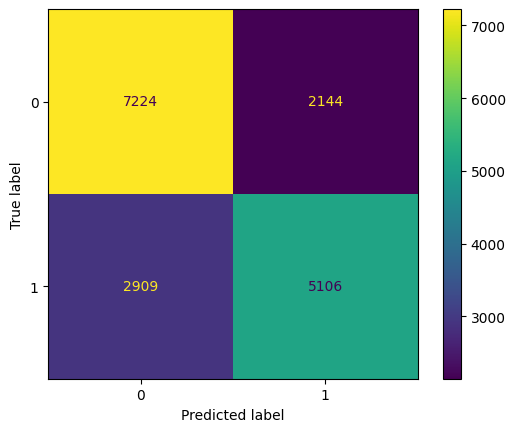

In [57]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix

y_pred = classifier_KNN.predict(X_test)
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

              precision    recall  f1-score   support

           0       0.71      0.84      0.77      9368
           1       0.76      0.61      0.67      8015

    accuracy                           0.73     17383
   macro avg       0.74      0.72      0.72     17383
weighted avg       0.74      0.73      0.73     17383



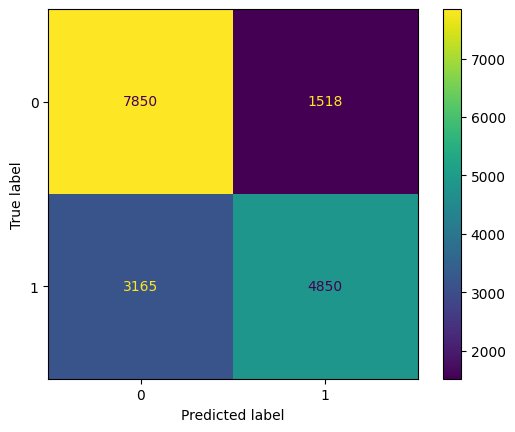

In [58]:
y_pred = classifier_log_reg.predict(X_test)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

Random Forest:
              precision    recall  f1-score   support

           0       0.72      0.78      0.75      9368
           1       0.71      0.64      0.68      8015

    accuracy                           0.72     17383
   macro avg       0.72      0.71      0.71     17383
weighted avg       0.72      0.72      0.71     17383



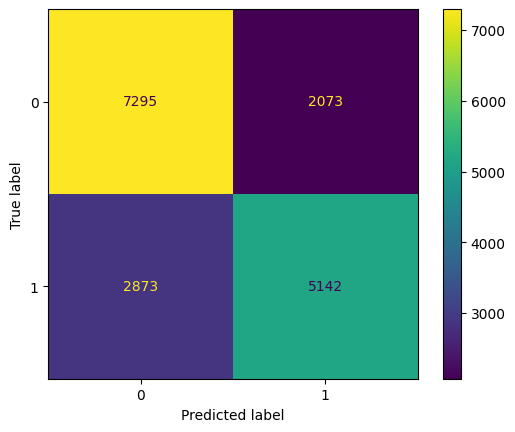

In [59]:
# Make predictions and evaluate for Random Forest
y_pred_rf = classifier_rf.predict(X_test)
print("Random Forest:")
print(classification_report(y_test, y_pred_rf))
cm_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(cm_rf).plot()


SVM:
              precision    recall  f1-score   support

           0       0.70      0.87      0.78      9368
           1       0.79      0.57      0.67      8015

    accuracy                           0.73     17383
   macro avg       0.75      0.72      0.72     17383
weighted avg       0.75      0.73      0.73     17383



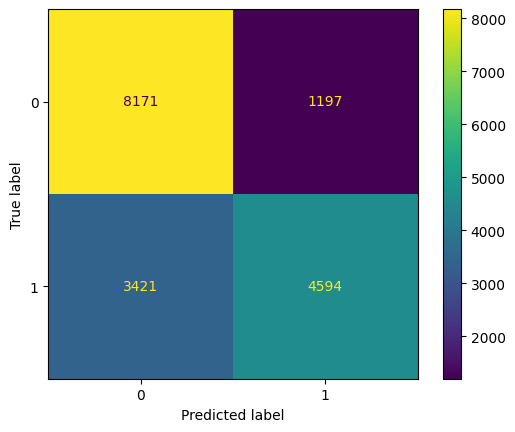

In [60]:
# Make predictions and evaluate for SVM
y_pred_svm = classifier_svm.predict(X_test)
print("\nSVM:")
print(classification_report(y_test, y_pred_svm))
cm_svm = confusion_matrix(y_test, y_pred_svm)
ConfusionMatrixDisplay(cm_svm).plot()


Naive Bayes:
              precision    recall  f1-score   support

           0       0.69      0.89      0.78      9368
           1       0.81      0.52      0.64      8015

    accuracy                           0.72     17383
   macro avg       0.75      0.71      0.71     17383
weighted avg       0.74      0.72      0.71     17383



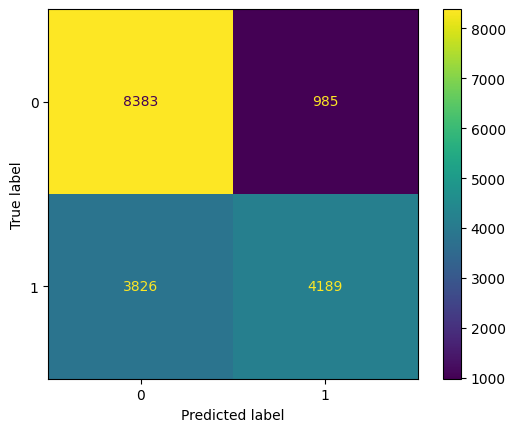

In [61]:
# Make predictions and evaluate for Naive Bayes
y_pred_nb = classifier_nb.predict(X_test)
print("\nNaive Bayes:")
print(classification_report(y_test, y_pred_nb))
cm_nb = confusion_matrix(y_test, y_pred_nb)
ConfusionMatrixDisplay(cm_nb).plot()

## 1.3 Paketering och demo
### 1.3.1 Spara modell
Börja med att plocka ut 100 slumpmässigt valda rader från ditt dataset. Exportera
dessa 100 samples i test samples.csv. Därefter tar du den bästa modellen
och träna på all data vi har förutom de 100 datapunkterna du plockade ut. Spara
därefter modellen i en .pkl-fil med hjälp av joblib.dump(). För modellen kan
du behöva använda argumentet compress för att komprimera om filstorleken
för stor.

In [97]:
from joblib import dump

# Väljer data_1 och random forest, som hade minst körtid, och högst recall samt precision. 

# Plocka ut 100 slumpmässigt valda rader och spara dem i en CSV-fil
data_samples = data_1.sample(n=100, random_state=42)
data_samples.to_csv('test_samples.csv', index=False)


In [99]:
# Träna den bästa modellen på hela datasetet förutom de 100 datapunkterna
X_train = data_1.drop("cardio", axis=1).drop(data_samples.index)
y_train = data_1['cardio'].drop(data_samples.index)

X_train.shape, y_train.shape

#  Träna modell på data
classifier_rf.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('rf', RandomForestClassifier())]),
             param_grid={'rf__max_depth': [None, 10],
                         'rf__n_estimators': [50, 100]},
             scoring='recall')

In [100]:
# Spara modellen i en .pkl-fil med joblib.dump()
dump(classifier_rf, 'best_model.pkl', compress=True)

['best_model.pkl']

### 1.3.2 ladda modellen

Skapa ett nytt skript: production model.py, ladda in test samples.csv och
din modell. Använd joblib.load() för att ladda in en .pkl-fil. Gör prediction
på de 100 datapunkterna och exportera en fil prediction.csv som ska innehålla
kolumnerna med ifyllda värden:
probability class 0
probability class 1
prediction

In [103]:
from joblib import load

# Läsa in data
test_samples = pd.read_csv('test_samples.csv')

# Ladda in med joblib.load()
best_model = load('best_model.pkl')

X_test = test_samples.drop("cardio", axis=1)
y_test = test_samples["cardio"]

# Gör förutsägelser på testdatapunkterna
y_pred = best_model.predict(X_test)

# Beräkna sannolikheten för varje klass
probabilities = best_model.predict_proba(X_test)
prob_class_0 = probabilities[:, 0]
prob_class_1 = probabilities[:, 1]

# Skapa en DataFrame för förutsägelser och sannolikheter
results = pd.DataFrame({
    'probability class 0': prob_class_0,
    'probability class 1': prob_class_1,
    'prediction': y_pred
})

# Exportera resultaten till prediction.csv
results.to_csv('prediction.csv', index=False)

In [102]:
results

,probability class 0,probability class 1,prediction
0,0.99,0.01,0
1,0.96,0.04,0
2,0.13,0.87,1
3,0.08,0.92,1
4,1.00,0.00,0
...,...,...,...
95,0.93,0.07,0
96,0.08,0.92,1
97,0.85,0.15,0
98,0.08,0.92,1


Random Forest:
              precision    recall  f1-score   support

           0       0.63      0.75      0.68        52
           1       0.66      0.52      0.58        48

    accuracy                           0.64       100
   macro avg       0.64      0.64      0.63       100
weighted avg       0.64      0.64      0.63       100



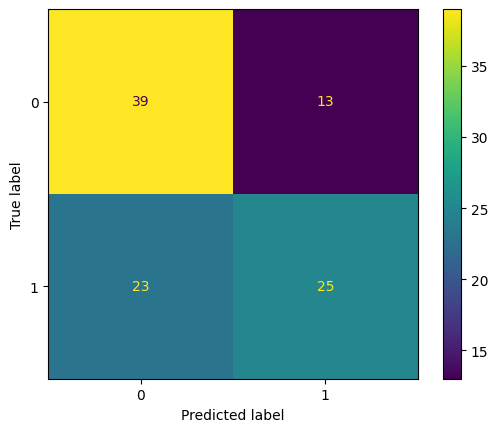

In [104]:
# Make predictions and evaluate for Random Forest
print("Random Forest:")
print(classification_report(y_test, y_pred))
cm_rf = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm_rf).plot()